In [1]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.GridWorldMDP.objectworld_utils import draw_path, generate_demonstrations, init_object_world, visitation_frequency
from src.deepmaxent_irl_objectworld import run_deepmaxent_irl
from src.maxent_irl_objectworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

In [3]:
np.random.seed(1)
BASIC_ARGS = """
--exp_name test
--height 6
--n_objects 50
--n_colours 6
--height 16
--width 16
--seed 2
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)

init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

# ow, P_a, rewards_gt, values_gt, policy_gt, feat_map = init_object_world(args)
# ow.grid

test
start positions:  [[5, 11]]


## Maxent

In [ ]:
MAXENT_ARGS = """
--exp_name maxent_rand
--type object
--n_objects 7
--n_colours 4
--height 32
--width 32
--gamma 0.8
--act_random 0.3
--n_trajs 5
--l_traj 6
--learning_rate 0.1
--n_iters 10
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
--seed 2
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, init_start_pos=init_start_pos)

In [ ]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [17]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type object
--n_objects 8
--n_colours 2
--height 6
--width 6
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--hiddens 3 3
--device cuda
--active
--seed 2
--verbose 2
"""

[0, 2, 4]

In [7]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type object
--n_objects 50
--n_colours 6
--height 16
--width 16
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.025
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 1.5
--hiddens 8 8
--device cuda
--active
--seed 2
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_active
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
Visitation Frequency
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

[[-1.     -1.     -1.     -0.9999 -0.9998 -0.9996 -0.999  -0.9958 -0.9876
  -0.9756 -0.956  -0.9687 -0.9856 -0.9947 -0.9978 -0.9992]
 [-1.     -1.     -1.     -0.9999 -0.9997 -0.9993 -0.9987 -0.9931 -0.9701
  -0.9469 -0.913  -0.9087 -0.9699 -0.989  -0.9957 -0.9984]
 [-1.     -1.     -0.9999 -0.9999 -0.9996 -0.9992 -0.9985 -0.9928 -0.9631
  -0.9196 -0.8715 -0.8712 -0.9568 -0.9862 -0.9935 -0.998 ]
 [-1.     -0.9999 -0.9999 -0.9999 -0.9997 -0.9993 -0.9981 -0.9906 -0.9485
  -0.8038 -0.7966 -0.8319 -0.9511 -0.981  -0.9935 -0.9978]
 [-0.9999 -0.9999 -0.9999 -0.9999 -0.9997 -0.9994 -0.9983 -0.9904 -0.9253
  -0.5355 -0.0898 -0.5806 -0.883  -0.9762 -0.9944 -0.9981]
 [-0.9998 -0.9998 -0.9998 -0.9998 -0.9996 -0.9994 -0.9986 -0.9932 -0.9298
  -0.1825  0.6838 -0.0073 -0.6864 -0.9581 -0.9917 -0.998 ]
 [-0.9987 -0.9988 -0.9989 -0.9989 -0.9986 -0.9988 -0.9987 -0.9951 -0.9577
  -0.6641 -0.042  -0.2366 -0.8448 -0.9697 -0.9927 -0.9964]
 [-0.9919 -0.993  -0.9956 -0.9956 -0.9927 -0.9935 -0.9952 -0.9943 -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9908 -0.988  -0.9836 -0.9782 -0.9717 -0.9669 -0.9642 -0.9468 -0.9186
  -0.8837 -0.8124 -0.7849 -0.8312 -0.8574 -0.8679 -0.89  ]
 [-0.9871 -0.985  -0.9796 -0.9732 -0.9647 -0.9577 -0.9485 -0.9242 -0.8759
  -0.8277 -0.7134 -0.5702 -0.7251 -0.7951 -0.8273 -0.8467]
 [-0.983  -0.9798 -0.9773 -0.9701 -0.9596 -0.9498 -0.9379 -0.8973 -0.8274
  -0.7561 -0.6665 -0.6243 -0.5828 -0.7705 -0.8323 -0.8781]
 [-0.978  -0.9786 -0.9803 -0.9709 -0.9549 -0.9454 -0.9261 -0.869  -0.7377
  -0.5768 -0.6613 -0.7073 -0.6838 -0.7947 -0.8577 -0.9104]
 [-0.9722 -0.9743 -0.9772 -0.9737 -0.956  -0.9451 -0.9227 -0.8502 -0.6133
  -0.0375  0.0524 -0.4199 -0.683  -0.8157 -0.8994 -0.9335]
 [-0.9561 -0.9656 -0.9678 -0.9683 -0.9541 -0.9467 -0.9319 -0.8645 -0.5335
   0.3884  0.6405  0.0135 -0.7328 -0.8667 -0.9196 -0.9502]
 [-0.9026 -0.9282 -0.9473 -0.9553 -0.949  -0.947  -0.9483 -0.8981 -0.7011
  -0.1506  0.1676 -0.065  -0.7189 -0.9039 -0.9412 -0.9394]
 [-0.6394 -0.8214 -0.9151 -0.9436 -0.9307 -0.9265 -0.9332 -0.9122 -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.7409 -0.6869 -0.4852 -0.0319  0.5271  0.7706  0.8377  0.8741  0.8638
   0.8154  0.7873  0.7053  0.6576  0.5909  0.6419  0.7133]
 [-0.8117 -0.8036 -0.7041 -0.3829  0.2757  0.6289  0.7395  0.8234  0.8625
   0.7707  0.6873  0.5821  0.5349  0.4815  0.5508  0.6586]
 [-0.8476 -0.8591 -0.7921 -0.6072 -0.0236  0.3344  0.5463  0.6959  0.7901
   0.7204  0.5858  0.4897  0.4186  0.1955  0.4467  0.5362]
 [-0.8431 -0.8577 -0.8333 -0.6955 -0.3504 -0.1388  0.1698  0.4402  0.6525
   0.7203  0.5363  0.3534  0.3619  0.1525  0.3068  0.447 ]
 [-0.8178 -0.8366 -0.8195 -0.7745 -0.6026 -0.5295 -0.3552 -0.0092  0.4632
   0.7102  0.7525  0.6294  0.4111  0.3869  0.2865  0.3821]
 [-0.7924 -0.8255 -0.7875 -0.7535 -0.7429 -0.7087 -0.6488 -0.4671  0.3156
   0.8057  0.9031  0.7948  0.5975  0.4814  0.4104  0.3743]
 [-0.7094 -0.7371 -0.6802 -0.7099 -0.6993 -0.7273 -0.7578 -0.5495  0.1057
   0.6133  0.7963  0.8284  0.6398  0.4243  0.3206  0.4421]
 [-0.4317 -0.4083 -0.5121 -0.6499 -0.5763 -0.5566 -0.6037 -0.417   0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.886  -0.8733 -0.8483 -0.7985 -0.7117 -0.5785 -0.4325 -0.4354 -0.4157
  -0.3801 -0.2215 -0.2274 -0.1969 -0.1384  0.0561  0.1986]
 [-0.8892 -0.883  -0.8599 -0.816  -0.7253 -0.6004 -0.5051 -0.4312 -0.3915
  -0.4007 -0.3097 -0.2073 -0.0698 -0.0721  0.1644  0.3605]
 [-0.8893 -0.8866 -0.8668 -0.8231 -0.7292 -0.6521 -0.5682 -0.5177 -0.4285
  -0.3969 -0.2645 -0.0373  0.2968  0.2159  0.1477  0.1426]
 [-0.8815 -0.8789 -0.8678 -0.8264 -0.7566 -0.698  -0.6437 -0.6047 -0.5168
  -0.3024 -0.1724  0.0901  0.2735  0.3531  0.0838 -0.0824]
 [-0.8688 -0.8673 -0.8583 -0.8411 -0.7896 -0.7466 -0.7081 -0.6766 -0.5806
  -0.234   0.1376  0.2292  0.3621  0.1327 -0.1086 -0.2444]
 [-0.8594 -0.8592 -0.8465 -0.8353 -0.8108 -0.7932 -0.7695 -0.7382 -0.5917
  -0.0132  0.4386  0.313   0.1341 -0.0631 -0.3005 -0.4287]
 [-0.8479 -0.8421 -0.8238 -0.8346 -0.816  -0.8009 -0.8083 -0.751  -0.6151
  -0.2503  0.2021  0.2589 -0.0899 -0.3526 -0.4493 -0.4203]
 [-0.8096 -0.7994 -0.8118 -0.8345 -0.8035 -0.7586 -0.7588 -0.7226 -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.733  -0.7009 -0.6235 -0.4906 -0.2965 -0.092   0.0397 -0.0222 -0.068
  -0.1071 -0.114  -0.1832 -0.1952 -0.2234 -0.1482 -0.0692]
 [-0.7492 -0.749  -0.6647 -0.5188 -0.3046 -0.0713  0.0455  0.0501 -0.0055
  -0.0576 -0.1131 -0.2392 -0.1781 -0.2591 -0.1308 -0.0245]
 [-0.7473 -0.7796 -0.6906 -0.5252 -0.2897 -0.1077  0.0325  0.0591  0.1025
   0.0564  0.0036 -0.0527 -0.1669 -0.1893 -0.0923 -0.016 ]
 [-0.6821 -0.7082 -0.6699 -0.515  -0.3423 -0.1593 -0.031   0.0067  0.0868
   0.2057  0.1701  0.0947  0.0116 -0.0137 -0.0115  0.0187]
 [-0.5615 -0.5876 -0.5669 -0.5465 -0.4243 -0.2554 -0.13   -0.0987  0.026
   0.2031  0.2214  0.2097  0.1716  0.1166  0.0821  0.1011]
 [-0.498  -0.501  -0.4736 -0.5018 -0.5177 -0.4036 -0.2699 -0.2406 -0.0169
   0.1758  0.1816  0.1687  0.155   0.1632  0.1434  0.1461]
 [-0.4792 -0.4466 -0.3652 -0.4503 -0.4589 -0.4192 -0.3671 -0.1772  0.0047
   0.0948  0.0651  0.1309  0.1227  0.1275  0.1761  0.2594]
 [-0.4356 -0.3314 -0.2727 -0.3789 -0.3611 -0.3    -0.254  -0.0943  0.04

  0%|          | 0/20 [00:00<?, ?it/s]

[[ 0.0411 -0.0341  0.0442  0.2646  0.4758  0.5829  0.5775  0.3065  0.0406
  -0.0523 -0.0592 -0.148  -0.2915 -0.4615 -0.384  -0.1301]
 [-0.2185 -0.3872 -0.1969  0.1145  0.414   0.5727  0.585   0.3724 -0.1012
  -0.0145  0.0386 -0.2384 -0.3023 -0.626  -0.4601 -0.2157]
 [-0.3499 -0.6354 -0.4196  0.041   0.428   0.5615  0.6247  0.5444  0.4837
   0.3823  0.383   0.2155 -0.0952 -0.4141 -0.2683 -0.0431]
 [-0.226  -0.4896 -0.5056 -0.1093  0.3757  0.583   0.6544  0.6492  0.6859
   0.6918  0.6273  0.4585  0.3588 -0.0175  0.0606  0.2961]
 [ 0.0676 -0.2526 -0.3506 -0.3148  0.0888  0.4963  0.6641  0.6861  0.7551
   0.7831  0.6798  0.5032  0.3191  0.4763  0.4767  0.6266]
 [ 0.1531 -0.1516 -0.2126 -0.3781 -0.392   0.0926  0.5365  0.6813  0.7577
   0.7819  0.6537  0.3299  0.0096  0.2953  0.5952  0.7508]
 [ 0.1897 -0.0146 -0.1038 -0.486  -0.4607 -0.2035  0.2256  0.683   0.7208
   0.6585  0.3122 -0.0849 -0.0132  0.2965  0.646   0.8304]
 [ 0.3084  0.2919  0.0688 -0.5655 -0.3855 -0.055   0.3294  0.7015  0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.7245 -0.7305 -0.6586 -0.448  -0.018   0.4696  0.6718  0.534   0.3448
   0.1262 -0.0272 -0.2443 -0.2733 -0.4977 -0.4727 -0.3133]
 [-0.7774 -0.8111 -0.7374 -0.5353 -0.0774  0.4518  0.6256  0.5868  0.308
   0.1139 -0.1188 -0.4773 -0.3312 -0.6217 -0.5026 -0.3349]
 [-0.7901 -0.8643 -0.7774 -0.5489 -0.0354  0.36    0.6102  0.606   0.5974
   0.3819  0.1911  0.018  -0.2575 -0.5005 -0.3596 -0.1961]
 [-0.7228 -0.7916 -0.781  -0.5376 -0.1708  0.2734  0.5319  0.5831  0.6448
   0.6719  0.5748  0.3595  0.2408 -0.2358 -0.1297  0.1223]
 [-0.5517 -0.6594 -0.6723 -0.6657 -0.3996  0.0839  0.4309  0.5315  0.6651
   0.7065  0.6248  0.5206  0.2773  0.4165  0.3703  0.523 ]
 [-0.4649 -0.5624 -0.5878 -0.6839 -0.6962 -0.2688  0.229   0.4281  0.6661
   0.7256  0.595   0.3576  0.2298  0.449   0.5823  0.6659]
 [-0.4586 -0.499  -0.4387 -0.6737 -0.6475 -0.4079 -0.0804  0.4501  0.609
   0.5692  0.2016  0.038   0.162   0.4196  0.6522  0.792 ]
 [-0.4575 -0.3121 -0.299  -0.6179 -0.4986 -0.1028  0.2443  0.5543  0.57

  0%|          | 0/20 [00:00<?, ?it/s]

[[-8.436e-01 -8.375e-01 -8.128e-01 -7.663e-01 -6.898e-01 -5.924e-01
  -4.975e-01 -4.859e-01 -4.639e-01 -4.610e-01 -4.949e-01 -4.776e-01
  -4.451e-01 -5.205e-01 -5.934e-01 -6.384e-01]
 [-8.276e-01 -8.357e-01 -8.133e-01 -7.668e-01 -6.835e-01 -5.704e-01
  -4.687e-01 -4.078e-01 -4.262e-01 -3.906e-01 -3.936e-01 -4.202e-01
  -3.500e-01 -4.696e-01 -5.573e-01 -6.347e-01]
 [-8.023e-01 -8.228e-01 -8.040e-01 -7.604e-01 -6.705e-01 -5.689e-01
  -4.409e-01 -3.344e-01 -2.363e-01 -2.707e-01 -2.472e-01 -2.284e-01
  -2.358e-01 -4.114e-01 -4.810e-01 -5.737e-01]
 [-7.609e-01 -7.804e-01 -7.886e-01 -7.450e-01 -6.783e-01 -5.713e-01
  -4.292e-01 -2.760e-01 -9.220e-02 -1.350e-02 -8.800e-02 -1.428e-01
  -1.785e-01 -3.680e-01 -4.470e-01 -4.980e-01]
 [-6.900e-01 -7.254e-01 -7.399e-01 -7.407e-01 -6.923e-01 -5.886e-01
  -4.297e-01 -2.372e-01  4.560e-02  1.880e-01  8.220e-02 -1.134e-01
  -2.543e-01 -2.814e-01 -3.897e-01 -4.254e-01]
 [-6.188e-01 -6.657e-01 -6.883e-01 -7.208e-01 -7.101e-01 -6.138e-01
  -4.508e-01 -2.4

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.5663 -0.5569 -0.5428 -0.5252 -0.5056 -0.4849 -0.4681 -0.4749 -0.4723
  -0.4502 -0.4295 -0.4076 -0.4125 -0.4468 -0.4686 -0.4781]
 [-0.5557 -0.5519 -0.5368 -0.5158 -0.4916 -0.4661 -0.4475 -0.4454 -0.4722
  -0.4199 -0.37   -0.3498 -0.3574 -0.4312 -0.4512 -0.4713]
 [-0.5433 -0.5423 -0.5304 -0.5073 -0.4775 -0.4481 -0.4185 -0.3978 -0.3779
  -0.3498 -0.2755 -0.2341 -0.2462 -0.3511 -0.4073 -0.4416]
 [-0.5254 -0.5238 -0.5207 -0.4999 -0.4695 -0.4325 -0.3902 -0.3412 -0.2744
  -0.2146 -0.1724 -0.1412 -0.1956 -0.3138 -0.373  -0.4052]
 [-0.5023 -0.5003 -0.4988 -0.4935 -0.4705 -0.4276 -0.371  -0.2866 -0.1199
   0.0354 -0.0133 -0.1766 -0.2484 -0.2764 -0.3408 -0.372 ]
 [-0.4761 -0.4749 -0.4745 -0.4814 -0.4732 -0.4374 -0.3751 -0.2547 -0.0327
   0.3454  0.1866 -0.2044 -0.331  -0.3412 -0.3428 -0.3704]
 [-0.4412 -0.4378 -0.4406 -0.4664 -0.4566 -0.4317 -0.3923 -0.288  -0.1509
  -0.0277 -0.1615 -0.3521 -0.376  -0.3594 -0.3426 -0.3332]
 [-0.3872 -0.3822 -0.4041 -0.4501 -0.4239 -0.3881 -0.3574 -0.3121 -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[ 0.4474  0.3771  0.3792  0.4545  0.5393  0.6002  0.6229  0.5563  0.4319
   0.3022  0.1739  0.0734 -0.0202 -0.1744 -0.1902 -0.1012]
 [ 0.2673  0.1385  0.1792  0.3034  0.4427  0.5253  0.5487  0.5115  0.3456
   0.2854  0.2028  0.0072 -0.0775 -0.2988 -0.2624 -0.1988]
 [ 0.1247 -0.0987 -0.0153  0.1708  0.3677  0.4292  0.4841  0.4947  0.5209
   0.4407  0.3808  0.2475 -0.0022 -0.2522 -0.1707 -0.0795]
 [ 0.0833 -0.0899 -0.1245  0.0273  0.2452  0.3383  0.4135  0.48    0.5892
   0.6334  0.5641  0.4121  0.2225 -0.0676 -0.0211  0.1507]
 [ 0.1156 -0.0711 -0.1191 -0.1172  0.0139  0.19    0.3447  0.4694  0.6689
   0.7591  0.6663  0.4354  0.2132  0.2752  0.2753  0.4277]
 [ 0.1127 -0.1034 -0.1123 -0.1722 -0.2401 -0.0476  0.2022  0.4444  0.6683
   0.7985  0.7371  0.403   0.1851  0.2935  0.4697  0.5944]
 [ 0.1747  0.0221 -0.0103 -0.1725 -0.2052 -0.1347  0.0257  0.4197  0.5736
   0.5966  0.4155  0.157   0.1732  0.3515  0.538   0.6859]
 [ 0.2942  0.239   0.1316 -0.1366 -0.0723  0.0336  0.2002  0.4734  0.

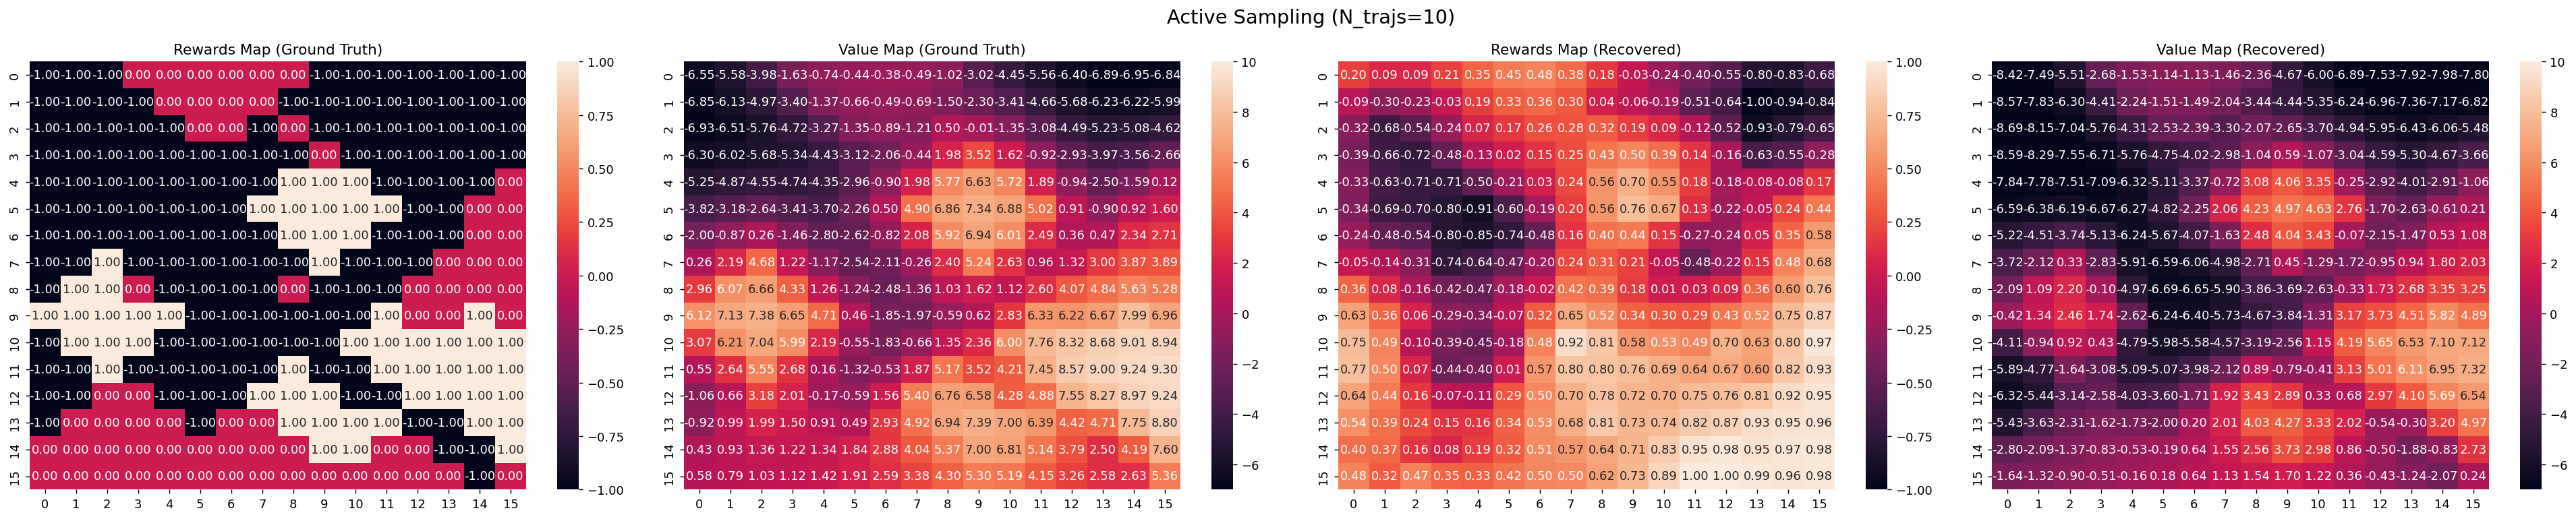

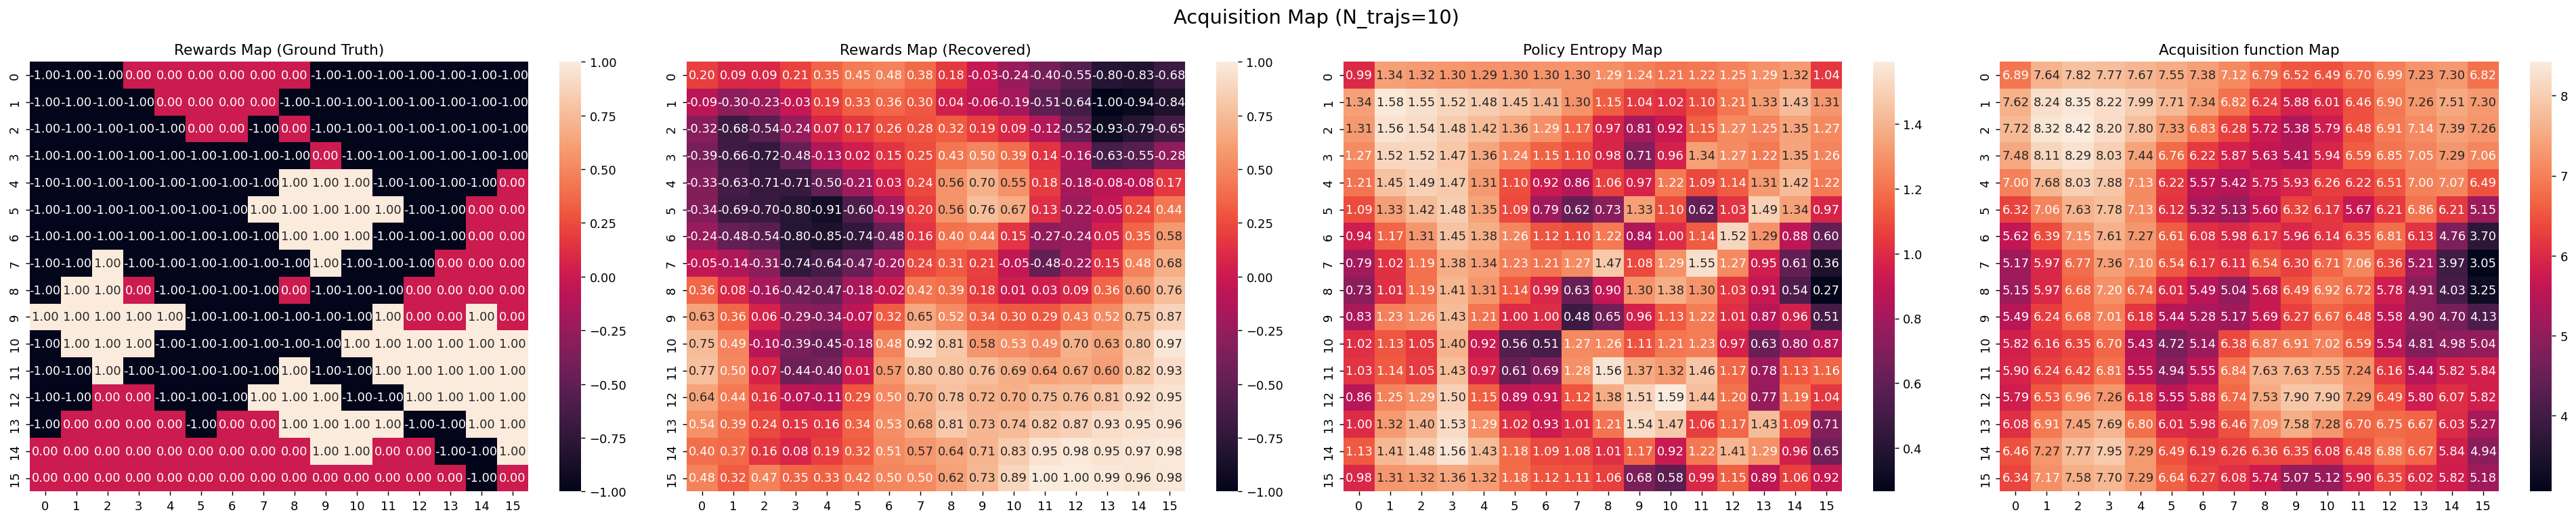

In [8]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None, figsize=(30, 6), dpi=130)
n_trajs = 10
visualizer.draw_value_maps(search_idx=n_trajs)
visualizer.draw_acq_maps(search_idx=n_trajs)

## Random

In [47]:
DEEP_MAXENT_RANDOM_ARGS = """
--exp_name deepmaxent_random
--type object
--n_objects 50
--n_colours 6
--height 16
--width 16
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 3.0
--hiddens 8 8
--device cuda
--seed 2
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_RANDOM_ARGS)
print(args.exp_name)
history_deepmaxent_random = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_random
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
Visitation Frequency
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

[[-1.     -1.     -0.9999 -0.9997 -0.9993 -0.9981 -0.9953 -0.9773 -0.9333
  -0.8766 -0.7997 -0.871  -0.941  -0.9819 -0.9924 -0.9967]
 [-1.     -1.     -0.9999 -0.9997 -0.999  -0.9977 -0.996  -0.9714 -0.8474
  -0.765  -0.6774 -0.6987 -0.9    -0.9701 -0.9864 -0.9943]
 [-0.9999 -0.9999 -0.9999 -0.9997 -0.999  -0.9981 -0.9968 -0.9828 -0.8802
  -0.6991 -0.5841 -0.6213 -0.9201 -0.9663 -0.9796 -0.9931]
 [-0.9999 -0.9999 -0.9998 -0.9997 -0.9993 -0.9988 -0.9971 -0.9848 -0.9035
  -0.5236 -0.3606 -0.5055 -0.8744 -0.9431 -0.9797 -0.9927]
 [-0.9998 -0.9998 -0.9997 -0.9997 -0.9996 -0.9992 -0.9979 -0.9892 -0.912
  -0.3554  0.3638  0.1991 -0.5002 -0.9109 -0.9814 -0.9939]
 [-0.9995 -0.9995 -0.9995 -0.9995 -0.9994 -0.9991 -0.9984 -0.9943 -0.9363
  -0.2861  0.7609  0.5579  0.2663 -0.7504 -0.9667 -0.9935]
 [-0.9977 -0.9976 -0.9974 -0.9978 -0.9969 -0.9975 -0.9982 -0.9948 -0.9511
  -0.5778  0.2224  0.3858 -0.2954 -0.8152 -0.9676 -0.9881]
 [-0.9879 -0.9878 -0.9913 -0.9895 -0.9783 -0.9815 -0.9897 -0.9912 -0.9

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.992  -0.9905 -0.9872 -0.9788 -0.9635 -0.936  -0.8911 -0.7623 -0.5739
  -0.308   0.0182 -0.2825 -0.718  -0.9083 -0.964  -0.9822]
 [-0.9894 -0.99   -0.9856 -0.9761 -0.9554 -0.9252 -0.8662 -0.7294 -0.5859
  -0.2047  0.1613 -0.0376 -0.6641 -0.8749 -0.9506 -0.9807]
 [-0.986  -0.9879 -0.9869 -0.9756 -0.9477 -0.8925 -0.7666 -0.5018 -0.1763
   0.0301  0.3415  0.2732 -0.237  -0.7902 -0.8881 -0.9574]
 [-0.9821 -0.9868 -0.9901 -0.9834 -0.9407 -0.8501 -0.5912  0.041   0.5409
   0.598   0.5942  0.5289 -0.0173 -0.7394 -0.8405 -0.8877]
 [-0.9758 -0.9842 -0.9886 -0.9854 -0.9627 -0.8552 -0.3642  0.5251  0.814
   0.8153  0.7429  0.3056 -0.3066 -0.3823 -0.7007 -0.7595]
 [-0.9509 -0.9762 -0.9811 -0.9822 -0.9747 -0.9126 -0.4227  0.7188  0.8379
   0.8737  0.8354  0.473  -0.1418 -0.5334 -0.5041 -0.5569]
 [-0.8261 -0.9092 -0.9513 -0.9695 -0.9601 -0.9306 -0.7149  0.4925  0.7148
   0.7583  0.7093  0.0115 -0.4016 -0.4886 -0.4552 -0.1049]
 [-0.4576 -0.6362 -0.8377 -0.9456 -0.8944 -0.7929 -0.4955  0.3355  0.2

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9666 -0.9598 -0.9401 -0.8919 -0.7893 -0.6143 -0.389  -0.1033  0.0418
   0.0568  0.0812 -0.0912 -0.3688 -0.6496 -0.7712 -0.8334]
 [-0.9607 -0.9646 -0.9485 -0.906  -0.806  -0.6299 -0.3729 -0.0036  0.1773
   0.1946  0.2318  0.0597 -0.2833 -0.5776 -0.7236 -0.8264]
 [-0.9522 -0.9612 -0.9562 -0.9225 -0.8293 -0.6807 -0.4053  0.0609  0.4123
   0.3761  0.3478  0.2226 -0.1683 -0.5511 -0.5813 -0.7308]
 [-0.9323 -0.9516 -0.9609 -0.9423 -0.8708 -0.7466 -0.4567  0.0931  0.5451
   0.6153  0.4586  0.2538 -0.0943 -0.4911 -0.5515 -0.5762]
 [-0.8929 -0.9291 -0.9476 -0.9508 -0.9238 -0.8269 -0.5405  0.0742  0.6417
   0.7402  0.6606  0.3131 -0.1005 -0.2308 -0.458  -0.4512]
 [-0.7998 -0.887  -0.9123 -0.9357 -0.9405 -0.8841 -0.6707 -0.0388  0.6192
   0.7741  0.7424  0.4903  0.0559 -0.2063 -0.2269 -0.2832]
 [-0.5128 -0.6844 -0.7887 -0.8728 -0.8846 -0.8681 -0.756  -0.106   0.4589
   0.5974  0.524   0.3219 -0.0023 -0.1204 -0.095   0.1182]
 [-0.0565 -0.1864 -0.4515 -0.7317 -0.707  -0.68   -0.5708 -0.0721  0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.7399 -0.734  -0.6654 -0.4982 -0.2157  0.0835  0.3063  0.4808  0.4942
   0.4049  0.3412  0.1471 -0.1125 -0.4334 -0.5324 -0.5482]
 [-0.7789 -0.8133 -0.7655 -0.6381 -0.3775 -0.076   0.1803  0.4665  0.5393
   0.4407  0.3823  0.1609 -0.1502 -0.4728 -0.5494 -0.5987]
 [-0.8007 -0.8507 -0.8331 -0.7406 -0.5223 -0.3176 -0.0356  0.3824  0.6318
   0.539   0.4181  0.2288 -0.2061 -0.5444 -0.4563 -0.5078]
 [-0.7824 -0.8505 -0.8707 -0.8203 -0.6835 -0.5434 -0.253   0.2583  0.6458
   0.7002  0.4805  0.1592 -0.1556 -0.4916 -0.4532 -0.3512]
 [-0.7282 -0.8254 -0.8581 -0.8658 -0.8245 -0.7171 -0.4632  0.0908  0.6687
   0.7877  0.697   0.3342 -0.121  -0.1945 -0.3415 -0.2191]
 [-0.6186 -0.7893 -0.8192 -0.8534 -0.8665 -0.8074 -0.6375 -0.1505  0.6185
   0.8191  0.7942  0.5301  0.0779 -0.0887 -0.0432 -0.0042]
 [-0.2867 -0.5408 -0.657  -0.7753 -0.8013 -0.7949 -0.7231 -0.1781  0.4565
   0.6067  0.5285  0.4051  0.1004  0.0132  0.1034  0.3459]
 [ 0.167   0.0022 -0.2907 -0.609  -0.5969 -0.5979 -0.5324 -0.0654  0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.7744 -0.7497 -0.6113 -0.2673  0.2664  0.6229  0.7612  0.7843  0.7552
   0.6669  0.5722  0.401   0.2825  0.0347  0.0317  0.1261]
 [-0.8295 -0.8534 -0.7761 -0.5197  0.023   0.503   0.6915  0.7713  0.773
   0.6622  0.5291  0.2497  0.1764 -0.0604 -0.0089  0.0607]
 [-0.8496 -0.8949 -0.8461 -0.6808 -0.2112  0.2105  0.541   0.7002  0.7736
   0.6911  0.5458  0.3847  0.0076 -0.222   0.0924  0.1576]
 [-0.8047 -0.864  -0.8614 -0.7569 -0.5151 -0.1968  0.2312  0.5373  0.7133
   0.7382  0.5944  0.3853  0.1538 -0.0805  0.0859  0.306 ]
 [-0.6866 -0.7898 -0.8105 -0.8173 -0.7386 -0.5524 -0.2039  0.2359  0.6288
   0.7269  0.6767  0.5333  0.3215  0.2823  0.2216  0.4056]
 [-0.5557 -0.715  -0.7196 -0.7791 -0.8303 -0.7383 -0.5291 -0.1976  0.5313
   0.7164  0.7053  0.6222  0.5059  0.4624  0.4831  0.5203]
 [-0.3248 -0.4422 -0.4263 -0.625  -0.7057 -0.7171 -0.65   -0.1124  0.4596
   0.5816  0.5482  0.611   0.5281  0.5267  0.5888  0.6807]
 [-0.0609  0.055   0.037  -0.2986 -0.3741 -0.4148 -0.3752  0.1001  0.4

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9794 -0.9727 -0.9444 -0.8308 -0.3631  0.4166  0.7785  0.8784  0.8744
   0.7698  0.6337  0.3432  0.1558 -0.1919 -0.2074 -0.1624]
 [-0.9818 -0.9823 -0.9707 -0.9169 -0.6492  0.0936  0.6497  0.8729  0.9151
   0.7873  0.5786  0.183   0.0312 -0.1799 -0.2087 -0.2087]
 [-0.982  -0.9847 -0.9785 -0.9549 -0.826  -0.5112  0.1634  0.7356  0.8888
   0.796   0.5058  0.1749 -0.39   -0.5702 -0.175  -0.1878]
 [-0.9739 -0.9805 -0.9799 -0.9663 -0.928  -0.847  -0.5499  0.2136  0.7538
   0.8042  0.4247 -0.1226 -0.4253 -0.5917 -0.4062 -0.1538]
 [-0.9532 -0.9674 -0.9712 -0.9733 -0.9633 -0.9383 -0.8634 -0.5584  0.4245
   0.7634  0.7293  0.4246 -0.1203 -0.3338 -0.4755 -0.2473]
 [-0.913  -0.9473 -0.9485 -0.9614 -0.9726 -0.9615 -0.9337 -0.8643  0.0574
   0.7767  0.8404  0.7466  0.444   0.1144 -0.0655 -0.1833]
 [-0.7785 -0.8327 -0.8346 -0.9049 -0.9359 -0.9501 -0.9469 -0.8334 -0.0949
   0.5006  0.6149  0.7894  0.5437  0.31    0.2087  0.2767]
 [-0.4592 -0.343  -0.4058 -0.6751 -0.7834 -0.8608 -0.8898 -0.744  -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-9.858e-01 -9.814e-01 -9.651e-01 -9.133e-01 -7.422e-01 -2.666e-01
   3.500e-01  6.274e-01  6.114e-01  3.674e-01  1.177e-01 -4.736e-01
  -7.454e-01 -9.093e-01 -9.424e-01 -9.546e-01]
 [-9.870e-01 -9.870e-01 -9.774e-01 -9.413e-01 -8.106e-01 -4.311e-01
   8.020e-02  6.137e-01  7.148e-01  3.995e-01 -3.940e-02 -5.933e-01
  -7.973e-01 -9.166e-01 -9.408e-01 -9.545e-01]
 [-9.870e-01 -9.896e-01 -9.833e-01 -9.605e-01 -8.667e-01 -6.806e-01
  -2.700e-01  3.805e-01  6.872e-01  4.513e-01 -6.840e-02 -4.951e-01
  -8.545e-01 -9.429e-01 -9.224e-01 -9.334e-01]
 [-9.807e-01 -9.863e-01 -9.859e-01 -9.707e-01 -9.331e-01 -8.479e-01
  -5.886e-01  2.820e-02  5.723e-01  6.263e-01  1.044e-01 -4.915e-01
  -8.003e-01 -9.278e-01 -9.169e-01 -8.853e-01]
 [-9.642e-01 -9.758e-01 -9.795e-01 -9.823e-01 -9.712e-01 -9.306e-01
  -7.945e-01 -3.649e-01  4.566e-01  6.384e-01  5.337e-01 -5.210e-02
  -6.757e-01 -7.860e-01 -8.596e-01 -8.228e-01]
 [-9.327e-01 -9.587e-01 -9.653e-01 -9.774e-01 -9.845e-01 -9.602e-01
  -8.884e-01 -6.6

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9326 -0.922  -0.8889 -0.7977 -0.5144  0.1028  0.5911  0.8289  0.8427
   0.7416  0.6321  0.0487 -0.4858 -0.7982 -0.8625 -0.8879]
 [-0.9382 -0.9359 -0.9171 -0.8585 -0.6681 -0.2225  0.2639  0.7569  0.8697
   0.6911  0.3975 -0.251  -0.6643 -0.819  -0.8676 -0.8934]
 [-0.9416 -0.943  -0.9309 -0.8971 -0.7786 -0.5805 -0.1615  0.5013  0.7855
   0.6143  0.1779 -0.3201 -0.7593 -0.8717 -0.8532 -0.8751]
 [-0.9364 -0.9426 -0.9408 -0.9168 -0.8645 -0.7891 -0.5431  0.1509  0.6552
   0.6935  0.221  -0.4017 -0.7233 -0.8706 -0.8598 -0.8314]
 [-0.9253 -0.9351 -0.9367 -0.935  -0.9141 -0.8755 -0.7553 -0.2729  0.5475
   0.6929  0.6417  0.1029 -0.6431 -0.7269 -0.8101 -0.7831]
 [-0.9016 -0.9243 -0.9239 -0.9281 -0.9335 -0.9042 -0.8406 -0.5889  0.4094
   0.7939  0.8727  0.6069  0.0759 -0.3897 -0.5397 -0.6402]
 [-0.8242 -0.855  -0.859  -0.8779 -0.8872 -0.8933 -0.8772 -0.6657  0.0648
   0.5216  0.6709  0.6232  0.1883 -0.123  -0.3345 -0.2741]
 [-0.6668 -0.6425 -0.6614 -0.7278 -0.7093 -0.7397 -0.7441 -0.5439 -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-8.544e-01 -8.447e-01 -8.011e-01 -6.937e-01 -4.459e-01 -2.000e-04
   4.398e-01  7.046e-01  6.891e-01  4.561e-01  1.480e-01 -3.968e-01
  -6.329e-01 -8.031e-01 -8.534e-01 -8.755e-01]
 [-8.622e-01 -8.609e-01 -8.404e-01 -7.607e-01 -5.633e-01 -1.995e-01
   1.801e-01  6.531e-01  7.655e-01  4.444e-01 -4.460e-02 -5.216e-01
  -7.084e-01 -8.150e-01 -8.593e-01 -8.825e-01]
 [-8.673e-01 -8.736e-01 -8.551e-01 -8.129e-01 -6.689e-01 -4.784e-01
  -1.512e-01  4.062e-01  6.775e-01  4.029e-01 -1.865e-01 -5.508e-01
  -7.801e-01 -8.624e-01 -8.527e-01 -8.671e-01]
 [-8.556e-01 -8.722e-01 -8.723e-01 -8.355e-01 -7.768e-01 -6.884e-01
  -4.494e-01  9.200e-02  5.354e-01  5.219e-01 -1.310e-01 -6.122e-01
  -7.625e-01 -8.658e-01 -8.574e-01 -8.339e-01]
 [-8.301e-01 -8.553e-01 -8.633e-01 -8.694e-01 -8.450e-01 -7.952e-01
  -6.562e-01 -2.455e-01  4.311e-01  5.592e-01  4.099e-01 -2.245e-01
  -7.198e-01 -7.726e-01 -8.199e-01 -7.917e-01]
 [-7.789e-01 -8.303e-01 -8.373e-01 -8.572e-01 -8.768e-01 -8.275e-01
  -7.458e-01 -5.1

  0%|          | 0/20 [00:00<?, ?it/s]

[[-9.654e-01 -9.612e-01 -9.388e-01 -8.678e-01 -6.409e-01 -4.870e-02
   5.685e-01  7.882e-01  7.475e-01  4.258e-01 -6.630e-02 -6.601e-01
  -8.317e-01 -9.340e-01 -9.581e-01 -9.682e-01]
 [-9.676e-01 -9.678e-01 -9.574e-01 -9.084e-01 -7.395e-01 -2.648e-01
   3.078e-01  7.651e-01  8.364e-01  4.614e-01 -2.437e-01 -7.595e-01
  -8.738e-01 -9.353e-01 -9.570e-01 -9.687e-01]
 [-9.673e-01 -9.717e-01 -9.617e-01 -9.353e-01 -8.178e-01 -5.806e-01
  -7.090e-02  5.641e-01  7.932e-01  5.038e-01 -2.804e-01 -7.138e-01
  -9.086e-01 -9.537e-01 -9.490e-01 -9.580e-01]
 [-9.561e-01 -9.645e-01 -9.636e-01 -9.429e-01 -9.002e-01 -7.960e-01
  -4.671e-01  2.336e-01  6.896e-01  6.758e-01 -4.920e-02 -7.062e-01
  -8.765e-01 -9.512e-01 -9.470e-01 -9.323e-01]
 [-9.301e-01 -9.460e-01 -9.510e-01 -9.572e-01 -9.434e-01 -8.938e-01
  -7.282e-01 -1.955e-01  5.994e-01  7.063e-01  5.343e-01 -2.160e-01
  -8.210e-01 -8.739e-01 -9.137e-01 -8.853e-01]
 [-8.857e-01 -9.182e-01 -9.265e-01 -9.456e-01 -9.611e-01 -9.229e-01
  -8.309e-01 -5.5

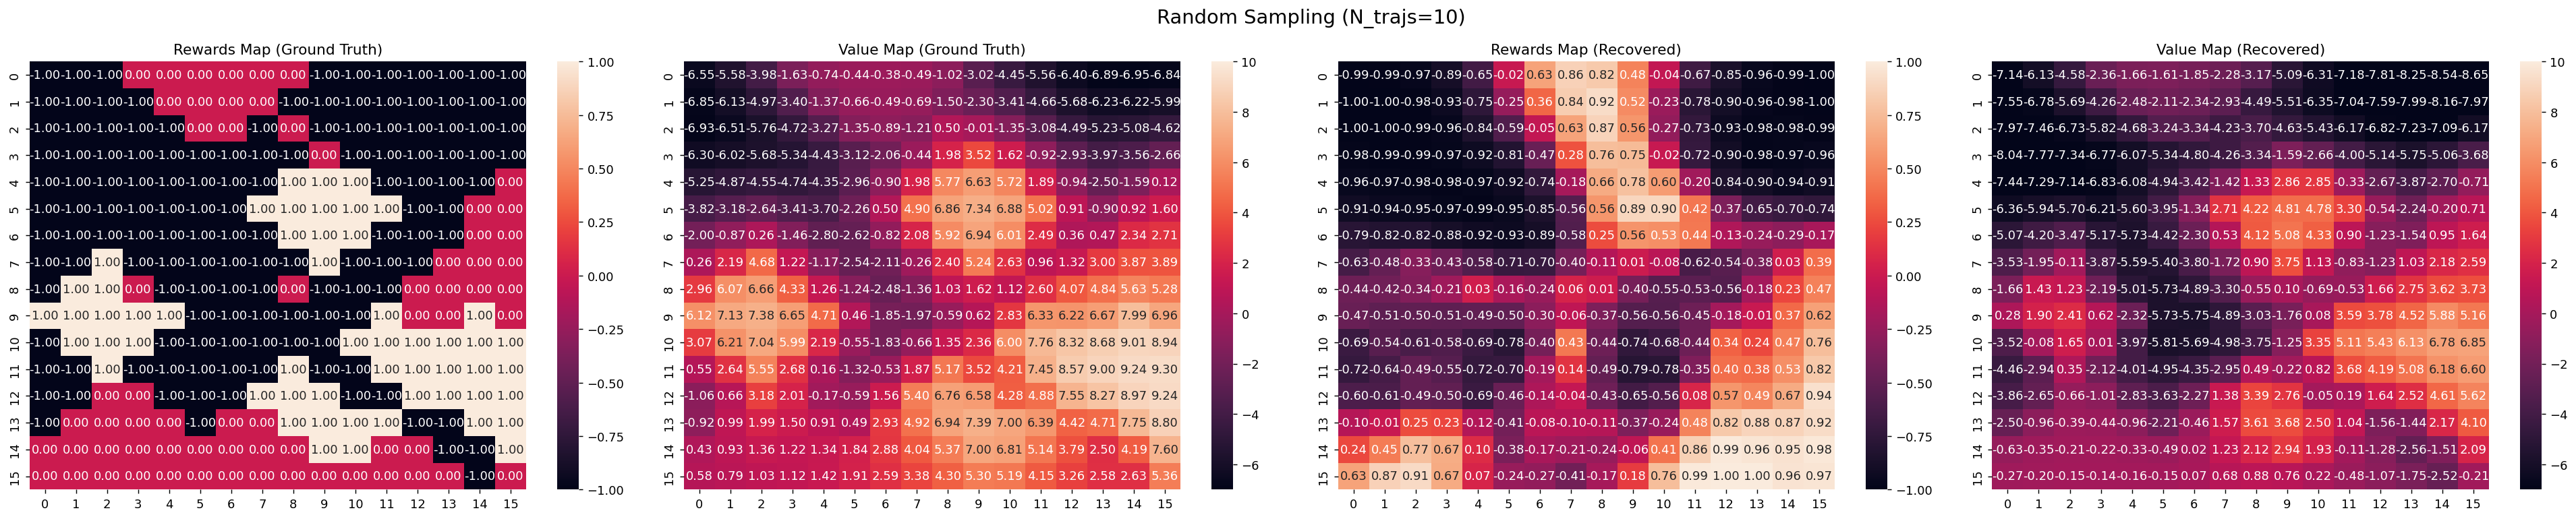

In [49]:
visualizer = Visualizer(history_deepmaxent_random, file_path=None, figsize=(30, 6), dpi=130)
n_trajs = 10
visualizer.draw_value_maps(search_idx=n_trajs)

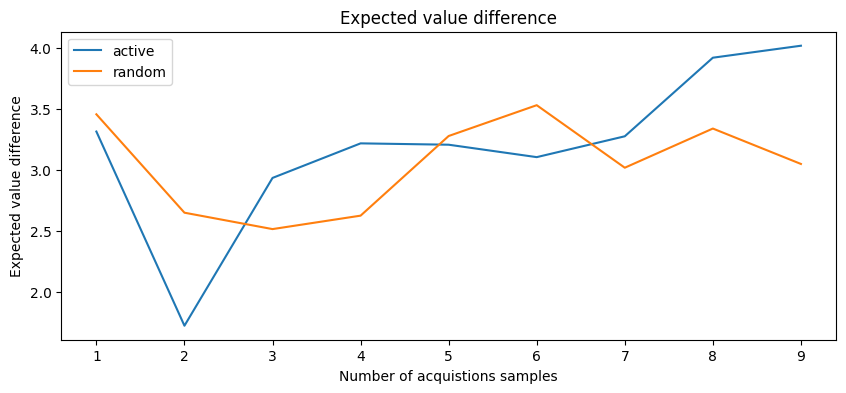

In [50]:
evd_act = get_evd(history_deepmaxent_active)
evd_rand = get_evd(history_deepmaxent_random)
draw_evd(evd_act[None, :], evd_rand[None, :])

## experiment

In [3]:
import pickle 
with open('exp_results_objectworld.pkl', 'rb') as f:
    exp_results = pickle.load(f)

In [7]:
print(exp_results.keys())
evd_acts = np.array(exp_results['deepmaxent_active'])
evd_rands = np.array(exp_results['deepmaxent_random'])
print(evd_acts.shape, evd_rands.shape)

dict_keys(['deepmaxent_active', 'deepmaxent_random'])
(30, 9) (30, 9)


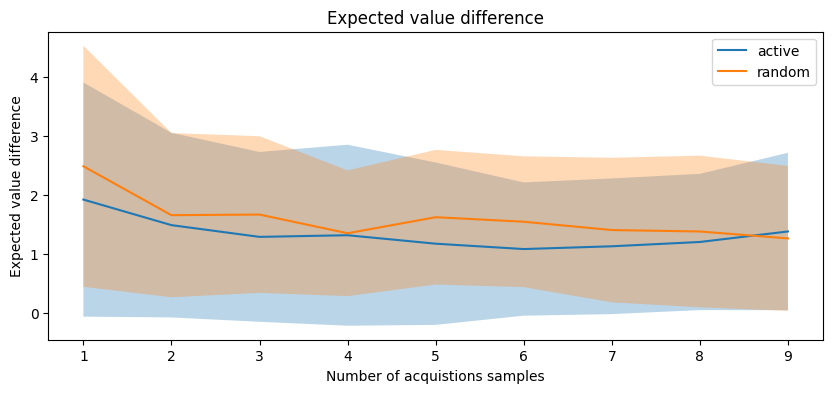

In [8]:
draw_evd(evd_acts, evd_rands)